In [1]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
train_path = '../chest_xray/train'
test_path = '../chest_xray/test'

train_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_ds = train_generator.flow_from_directory(
    train_path,
    subset='training',
    target_size=(256,256),
    class_mode='binary',
    seed=42
)

val_ds = train_generator.flow_from_directory(
    train_path,
    subset='validation',
    target_size=(256,256),
    class_mode='binary',
    seed=42
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (1, 1), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4
)

checkpoint = keras.callbacks.ModelCheckpoint(
    monitor='val_loss',
    filepath='save_data/01_basic_model/',
    save_weights_only=True
)

callbacks = [stop_early,checkpoint]

In [5]:
use_metrics = [metrics.BinaryAccuracy(),\
                metrics.Precision(),\
                metrics.Recall()]

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=[use_metrics]
)

In [6]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

model.load_weights('save_data/01_basic_model/')

Epoch 1/20
131/131 [==============================] - 68s 517ms/step - loss: 0.6429 - binary_accuracy: 0.8507 - precision: 0.8814 - recall: 0.9232 - val_loss: 0.2694 - val_binary_accuracy: 0.8830 - val_precision: 0.9851 - val_recall: 0.8555
Epoch 2/20
131/131 [==============================] - 67s 508ms/step - loss: 0.1399 - binary_accuracy: 0.9504 - precision: 0.9647 - recall: 0.9687 - val_loss: 0.2041 - val_binary_accuracy: 0.9195 - val_precision: 0.9098 - val_recall: 0.9897
Epoch 3/20
131/131 [==============================] - 67s 512ms/step - loss: 0.1008 - binary_accuracy: 0.9636 - precision: 0.9721 - recall: 0.9790 - val_loss: 0.1264 - val_binary_accuracy: 0.9521 - val_precision: 0.9853 - val_recall: 0.9497
Epoch 4/20
131/131 [==============================] - 67s 510ms/step - loss: 0.0918 - binary_accuracy: 0.9655 - precision: 0.9737 - recall: 0.9800 - val_loss: 0.1022 - val_binary_accuracy: 0.9578 - val_precision: 0.9621 - val_recall: 0.9819
Epoch 5/20
131/131 [================

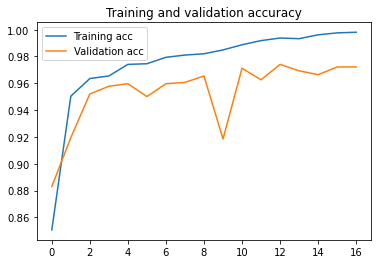

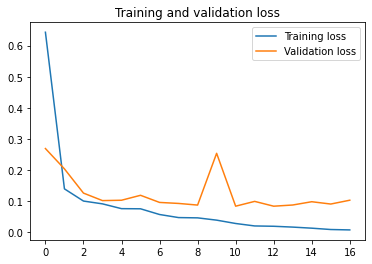

In [7]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [8]:
test_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_ds = train_generator.flow_from_directory(
    test_path,
    target_size=(256,256),
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [9]:
test_res = model.evaluate(test_ds)

20/20 [==============================] - 4s 182ms/step - loss: 2.0302 - binary_accuracy: 0.7340 - precision: 0.7029 - recall: 0.9949


In [10]:
model.save('save_data/01_basic_model/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: save_data/01_basic_model/assets
